Copie du code proposé dans l'article de TowardsData Science : https://towardsdatascience.com/using-neural-networks-to-solve-ordinary-differential-equations-a7806de99cdd
sur la résolution de l'équation différentielle suivante pour $x \in [-1, 1]$ :
$\frac{du}{dx}(x)=2x,
u(0) = 1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Defining variables

In [5]:
f0 = 1
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.01
training_steps = 500
batch_size = 100
display_step = 50
# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons
weights = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_output]))
}
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

Defining the Model and Loss Function

In [6]:
# Create model
def multilayer_perceptron(x):
  x = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2, weights['out']) + biases['out']
  return tf.nn.sigmoid(output)
# Universal Approximator
def g(x):
  return x * multilayer_perceptron(x) + f0
# Given EDO
def f(x):
  return 2*x
# Custom loss function to approximate the derivatives
def custom_loss():
  summation = []
  for x in np.linspace(-1,1,10):
    dNN = (g(x+inf_s)-g(x))/inf_s
    summation.append((dNN - f(x))**2)
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

Train function

In [7]:
def train_step():
  with tf.GradientTape() as tape:
    loss = custom_loss()
  trainable_variables=list(weights.values())+list(biases.values())
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))
# Training the Model:
for i in range(training_steps):
  train_step()
  if i % display_step == 0:
    print("loss: %f " % (custom_loss()))

loss: 1.312152 
loss: 1.277706 
loss: 1.254543 
loss: 1.230457 
loss: 1.198925 
loss: 1.158269 
loss: 1.116059 
loss: 1.081238 
loss: 1.054987 
loss: 1.035145 


Plotting the Results

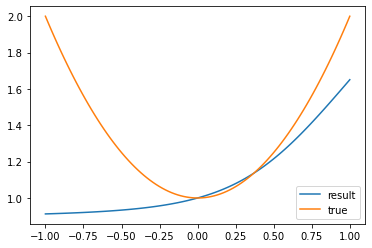

In [8]:
# True Solution (found analitically)
def true_solution(x):
  return x**2 + 1
X = np.linspace(-1, 1, 100)
result = []
for i in X:
  result.append(g(i).numpy()[0][0][0])
S = true_solution(X)
plt.plot(X, result, label ='result')
plt.plot(X, S, label ='true')
plt.legend()
plt.show()